# Agents with Human-in-loop and Tool Approval from HumanLayer

You can also check this cookbook in colab [here](https://colab.research.google.com/drive/1WF1Z6Ev6kTrifRLXXTTOZz6-QVRuj1uX?usp=sharing)

<div class="align-center">
  <a href="https://www.camel-ai.org/"><img src="https://i.postimg.cc/KzQ5rfBC/button.png"width="150"></a>
  <a href="https://discord.camel-ai.org"><img src="https://i.postimg.cc/L4wPdG9N/join-2.png"  width="150"></a></a>
  
⭐ <i>Star us on [*Github*](https://github.com/camel-ai/camel), join our [*Discord*](https://discord.camel-ai.org) or follow our [*X*](https://x.com/camelaiorg)
</div>

This notebook demonstrates how to set up and leverage CAMEL's ability to interact with user (for approval or comments) during the execution of the tasks.

In this notebook, you'll explore:

*   **CAMEL**: A powerful multi-agent framework that enables Retrieval-Augmented Generation and multi-agent role-playing scenarios, allowing for sophisticated AI-driven tasks.
*   **HumanLayer**: HumanLayer is an API and SDK that enables AI Agents to contact humans for feedback, input, and approvals.
*   **Human-in-loop**: The ability for agent to consult human during the execution of the task.
*   **Human approval**: The ability for agent ask approval to execute some tasks.

This cookbook demonstrates how to use **HumanLayer** functionality within CAMEL framework.

![Screenshot 2025-01-24 at 14.25.59.png](<attachment:Screenshot 2025-01-24 at 14.25.59.png>)
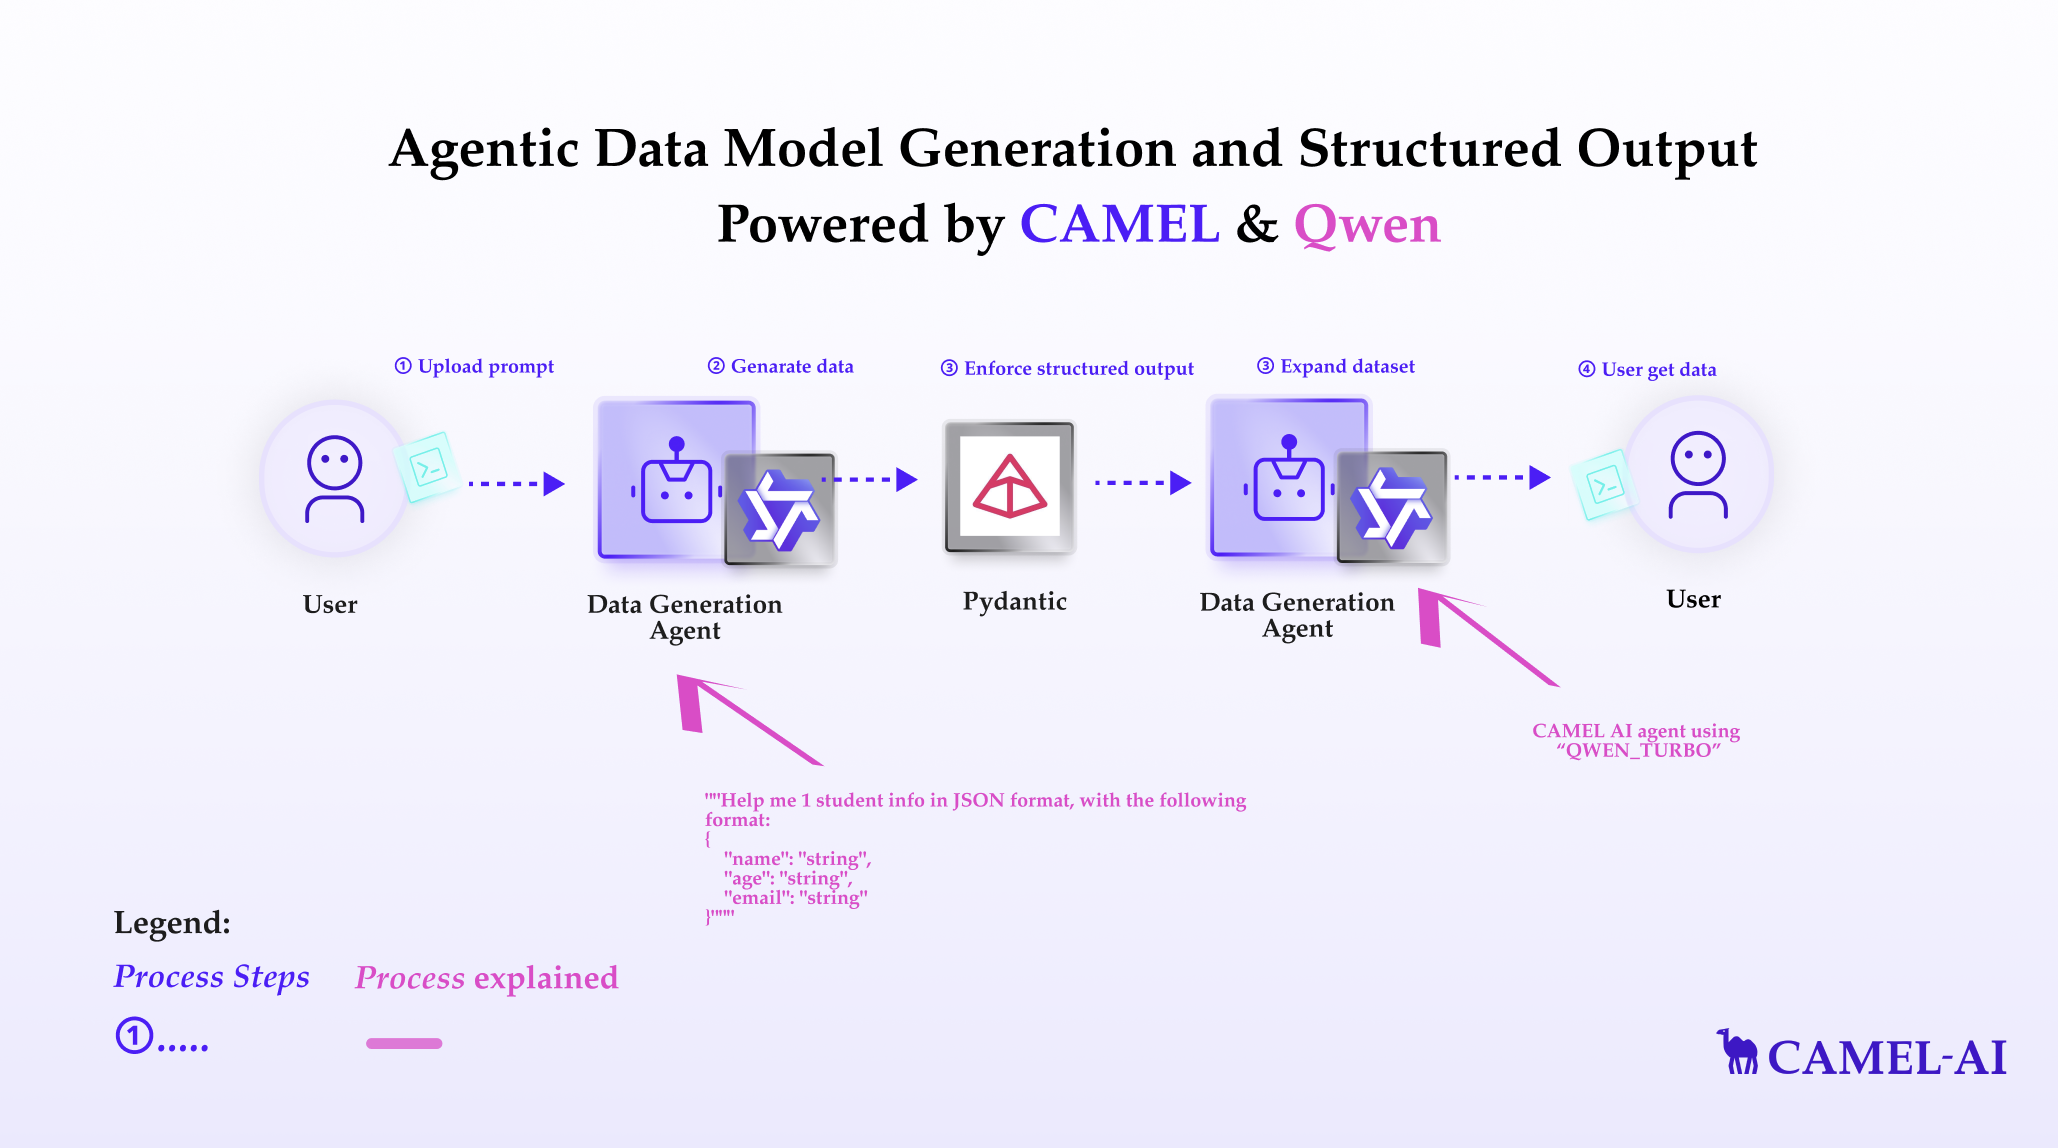

## 📦 Installation

First, install the CAMEL package with all its dependencies:

In [ ]:
!pip install "camel-ai[all]==0.2.16"

Next, install humanlayer python SDK:

In [ ]:
!pip install humanlayer

## 🔑 Setting Up API Keys

Your can go to [here](https://openai.com/index/openai-api/) to get API Key from OpenAI.

In [ ]:
# Prompt for the API key securely
import os
from getpass import getpass

openai_api_key = getpass('Enter your API key: ')
os.environ["OPENAI_API_KEY"] = openai_api_key

Enter your API key: ··········


Your can go to [here](https://app.humanlayer.dev/auth) to get API Key from HumanLayer.

In [ ]:
humanlayer_api_key = getpass('Enter your HumanLayer API key: ')
os.environ["HUMANLAYER_API_KEY"] = humanlayer_api_key

## 👨 Tools that requires human approval

In this section, we'll demonstrate how to define tools for Camel agent to use, and use **HumanLayer** to make some tools require human approval. First define two functions for agent to use, one of them requires human approval.

In [4]:
from humanlayer.core.approval import HumanLayer
hl = HumanLayer(api_key=humanlayer_api_key, verbose=True)


# add can be called without approval
def add(x: int, y: int) -> int:
    """Add two numbers together."""
    return x + y


# but multiply must be approved by a human
@hl.require_approval()
def multiply(x: int, y: int) -> int:
    """multiply two numbers"""
    return x * y

/usr/local/lib/python3.11/dist-packages/pydantic/main.py:214: UserWarning: A custom validator is returning a value other than `self`.
Returning anything other than `self` from a top level model validator isn't supported when validating via `__init__`.
See the `model_validator` docs (https://docs.pydantic.dev/latest/concepts/validators/#model-validators) for more details.
  warnings.warn(


Next we define the CAMEL agents, then run the computation commands. Here we will need to login HumanLayer cloud platform to approve for the agent to use the multiply function.

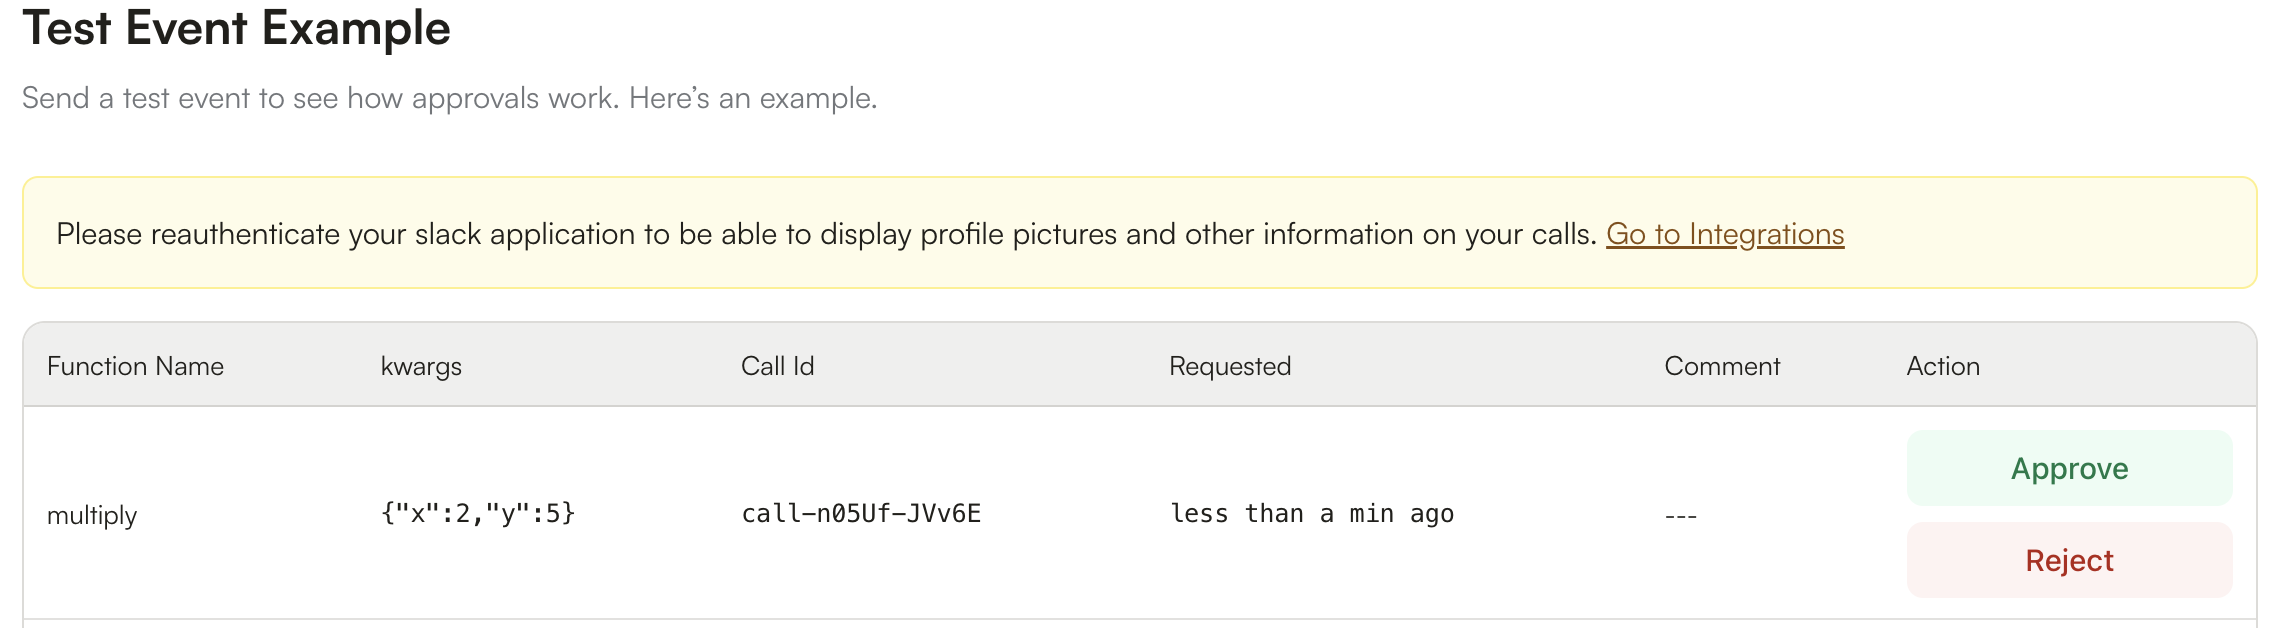

In [6]:
from camel.toolkits import FunctionTool
from camel.agents import ChatAgent
from camel.models import ModelFactory
from camel.types import ModelPlatformType, ModelType

model = ModelFactory.create(
    model_platform=ModelPlatformType.OPENAI,
    model_type=ModelType.GPT_4O,
)

tools = [FunctionTool(add), FunctionTool(multiply)]

agent_with_tools = ChatAgent(
    model = model,
    tools=tools
)

# Interact with the agent
response = agent_with_tools.step("multiply 2 and 5, then add 32 to the result")
print("\n\n----------Result----------\n\n")
print(response.msgs[0].content)


HumanLayer: waiting for approval for multiply via humanlayer cloud
HumanLayer: human approved multiply


----------Result----------


The result of multiplying 2 and 5, then adding 32 to the result, is 42.


## 🤖 Human-in-loop interaction

Sometimes we want the agent to ask user during the working process, in this case, we can equip agent with human toolkits, and be able to ask human via console. This example demonstrates the human-in-loop function:

In [10]:
from camel.toolkits import HumanToolkit
human_toolkit = HumanToolkit()

agent = ChatAgent(
    system_message="You are a helpful assistant.",
    model=model,
    tools=[*human_toolkit.get_tools()],
)

response = agent.step(
    "Test me on the capital of some country, and comment on my answer."
)

print(response.msgs[0].content)

Question: What is the capital of France?
Your reply: Paris
Correct! The capital of France is indeed Paris. It's a beautiful city known for its art, fashion, and culture. Well done!


## 🌟 Highlights

This notebook has guided you through setting up chat agents with the ability of **Human-in-loop** and **Human approval**.

Key tools utilized in this notebook include:

*   **CAMEL**: A powerful multi-agent framework that enables Retrieval-Augmented Generation and multi-agent role-playing scenarios, allowing for sophisticated AI-driven tasks.
*   **HumanLayer**: HumanLayer is an API and SDK that enables AI Agents to contact humans for feedback, input, and approvals.
*   **Human-in-loop**: The ability for agent to consult human during the execution of the task.
*   **Human approval**: The ability for agent ask approval to execute some tasks.


That's everything: Got questions about 🐫 CAMEL-AI? Join us on [Discord](https://discord.camel-ai.org)! Whether you want to share feedback, explore the latest in multi-agent systems, get support, or connect with others on exciting projects, we’d love to have you in the community! 🤝

Check out some of our other work:

1. 🐫 Creating Your First CAMEL Agent [free Colab](https://docs.camel-ai.org/cookbooks/create_your_first_agent.html)

2.  Graph RAG Cookbook [free Colab](https://colab.research.google.com/drive/1uZKQSuu0qW6ukkuSv9TukLB9bVaS1H0U?usp=sharing)

3. 🧑‍⚖️ Create A Hackathon Judge Committee with Workforce [free Colab](https://colab.research.google.com/drive/18ajYUMfwDx3WyrjHow3EvUMpKQDcrLtr?usp=sharing)

4. 🔥 3 ways to ingest data from websites with Firecrawl & CAMEL [free Colab](https://colab.research.google.com/drive/1lOmM3VmgR1hLwDKdeLGFve_75RFW0R9I?usp=sharing)

5. 🦥 Agentic SFT Data Generation with CAMEL and Mistral Models, Fine-Tuned with Unsloth [free Colab](https://colab.research.google.com/drive/1lYgArBw7ARVPSpdwgKLYnp_NEXiNDOd-?usp=sharingg)

Thanks from everyone at 🐫 CAMEL-AI


<div class="align-center">
  <a href="https://www.camel-ai.org/"><img src="https://i.postimg.cc/KzQ5rfBC/button.png"width="150"></a>
  <a href="https://discord.camel-ai.org"><img src="https://i.postimg.cc/L4wPdG9N/join-2.png"  width="150"></a></a>
  
⭐ <i>Star us on [*Github*](https://github.com/camel-ai/camel), join our [*Discord*](https://discord.camel-ai.org) or follow our [*X*](https://x.com/camelaiorg)
</div>